In [44]:
# type: ignore
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [45]:
#Import the dataset

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/381/data.csv"

# File path for dataset 
filepath = "./dataset/ObesityDataSet_raw_and_data_sinthetic.csv"

# load the data into a Pandas DataFrame using URL or file path
pm25_df = pd.read_csv(url)
pm25_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [46]:
# Renaming cols for better readability
pm25_df.rename(columns={
    'year': 'Year',
    'month': 'Month',
    'day': 'Day',
    'hour': 'Hour',
    'pm2.5': 'PM2.5_concentration_µg_m3',
    'DEWP': 'Dew_Point_Celsius',
    'TEMP': 'Temperature_Celsius',
    'PRES': 'Pressure_hPa',
    'cbwd': 'Combined_Wind_Direction',
    'Iws': 'Cumulated_Wind_Speed_m_s',
    'Is': 'Cumulated_Snow_Hours',
    'Ir': 'Cumulated_Rain_Hours'
}, inplace=True)


In [47]:
pm25_df.shape

(43824, 13)

In [48]:
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No                         43824 non-null  int64  
 1   Year                       43824 non-null  int64  
 2   Month                      43824 non-null  int64  
 3   Day                        43824 non-null  int64  
 4   Hour                       43824 non-null  int64  
 5   PM2.5_concentration_µg_m3  41757 non-null  float64
 6   Dew_Point_Celsius          43824 non-null  int64  
 7   Temperature_Celsius        43824 non-null  float64
 8   Pressure_hPa               43824 non-null  float64
 9   Combined_Wind_Direction    43824 non-null  object 
 10  Cumulated_Wind_Speed_m_s   43824 non-null  float64
 11  Cumulated_Snow_Hours       43824 non-null  int64  
 12  Cumulated_Rain_Hours       43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usag

In [49]:
# Check the summary statistics
pm25_df.describe()

,No,Year,Month,Day,Hour,PM2.5_concentration_µg_m3,Dew_Point_Celsius,Temperature_Celsius,Pressure_hPa,Cumulated_Wind_Speed_m_s,Cumulated_Snow_Hours,Cumulated_Rain_Hours
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [50]:
# Checking for duplicates
pm25_df.duplicated().sum()

0

In [51]:
# Preparing for data cleaning
pm25_df.isnull().sum()

No                              0
Year                            0
Month                           0
Day                             0
Hour                            0
PM2.5_concentration_µg_m3    2067
Dew_Point_Celsius               0
Temperature_Celsius             0
Pressure_hPa                    0
Combined_Wind_Direction         0
Cumulated_Wind_Speed_m_s        0
Cumulated_Snow_Hours            0
Cumulated_Rain_Hours            0
dtype: int64

In [52]:
# Drop the rows if the missing values is less than 10%
# else fill the missing values with the mean of the column

missing_info = pm25_df.isnull().sum() / len(pm25_df) * 100

for column in pm25_df.columns:
    if missing_info[column] > 10:
        pm25_df[column].fillna(pm25_df[column].mean(), inplace=True)
    else:
        pm25_df.dropna(subset=[column], inplace=True)


pm25_df.isnull().sum()


No                           0
Year                         0
Month                        0
Day                          0
Hour                         0
PM2.5_concentration_µg_m3    0
Dew_Point_Celsius            0
Temperature_Celsius          0
Pressure_hPa                 0
Combined_Wind_Direction      0
Cumulated_Wind_Speed_m_s     0
Cumulated_Snow_Hours         0
Cumulated_Rain_Hours         0
dtype: int64

In [53]:
# Check the shape of the dataframe after handling null values
pm25_df.shape

(41757, 13)

In [54]:
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No                         41757 non-null  int64  
 1   Year                       41757 non-null  int64  
 2   Month                      41757 non-null  int64  
 3   Day                        41757 non-null  int64  
 4   Hour                       41757 non-null  int64  
 5   PM2.5_concentration_µg_m3  41757 non-null  float64
 6   Dew_Point_Celsius          41757 non-null  int64  
 7   Temperature_Celsius        41757 non-null  float64
 8   Pressure_hPa               41757 non-null  float64
 9   Combined_Wind_Direction    41757 non-null  object 
 10  Cumulated_Wind_Speed_m_s   41757 non-null  float64
 11  Cumulated_Snow_Hours       41757 non-null  int64  
 12  Cumulated_Rain_Hours       41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4

In [55]:
# combining the date columns into a single column
pm25_df["datetime"] = pd.to_datetime(pm25_df[["Year", "Month", "Day", "Hour"]])

In [56]:
pm25_df.drop(["No", "Year", "Month", "Day", "Hour"], axis=1, inplace=True)
pm25_df.head()

,PM2.5_concentration_µg_m3,Dew_Point_Celsius,Temperature_Celsius,Pressure_hPa,Combined_Wind_Direction,Cumulated_Wind_Speed_m_s,Cumulated_Snow_Hours,Cumulated_Rain_Hours,datetime
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [57]:
# Check the unique values in the Wind Direction column
pm25_df['Combined_Wind_Direction'].value_counts()

Combined_Wind_Direction
SE    14573
NW    13484
cv     8944
NE     4756
Name: count, dtype: int64

In [58]:
# Encoding the Wind Direction column
pm25_df = pd.get_dummies(pm25_df, columns=["Combined_Wind_Direction"], drop_first=True)

# Convert boolean columns to integers (0 or 1)
pm25_df[
    [
        "Combined_Wind_Direction_NW",
        "Combined_Wind_Direction_SE",
        "Combined_Wind_Direction_cv",
    ]
] = pm25_df[
    [
        "Combined_Wind_Direction_NW",
        "Combined_Wind_Direction_SE",
        "Combined_Wind_Direction_cv",
    ]
].astype(
    int
)
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41757 entries, 24 to 43823
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PM2.5_concentration_µg_m3   41757 non-null  float64       
 1   Dew_Point_Celsius           41757 non-null  int64         
 2   Temperature_Celsius         41757 non-null  float64       
 3   Pressure_hPa                41757 non-null  float64       
 4   Cumulated_Wind_Speed_m_s    41757 non-null  float64       
 5   Cumulated_Snow_Hours        41757 non-null  int64         
 6   Cumulated_Rain_Hours        41757 non-null  int64         
 7   datetime                    41757 non-null  datetime64[ns]
 8   Combined_Wind_Direction_NW  41757 non-null  int32         
 9   Combined_Wind_Direction_SE  41757 non-null  int32         
 10  Combined_Wind_Direction_cv  41757 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3)
memor

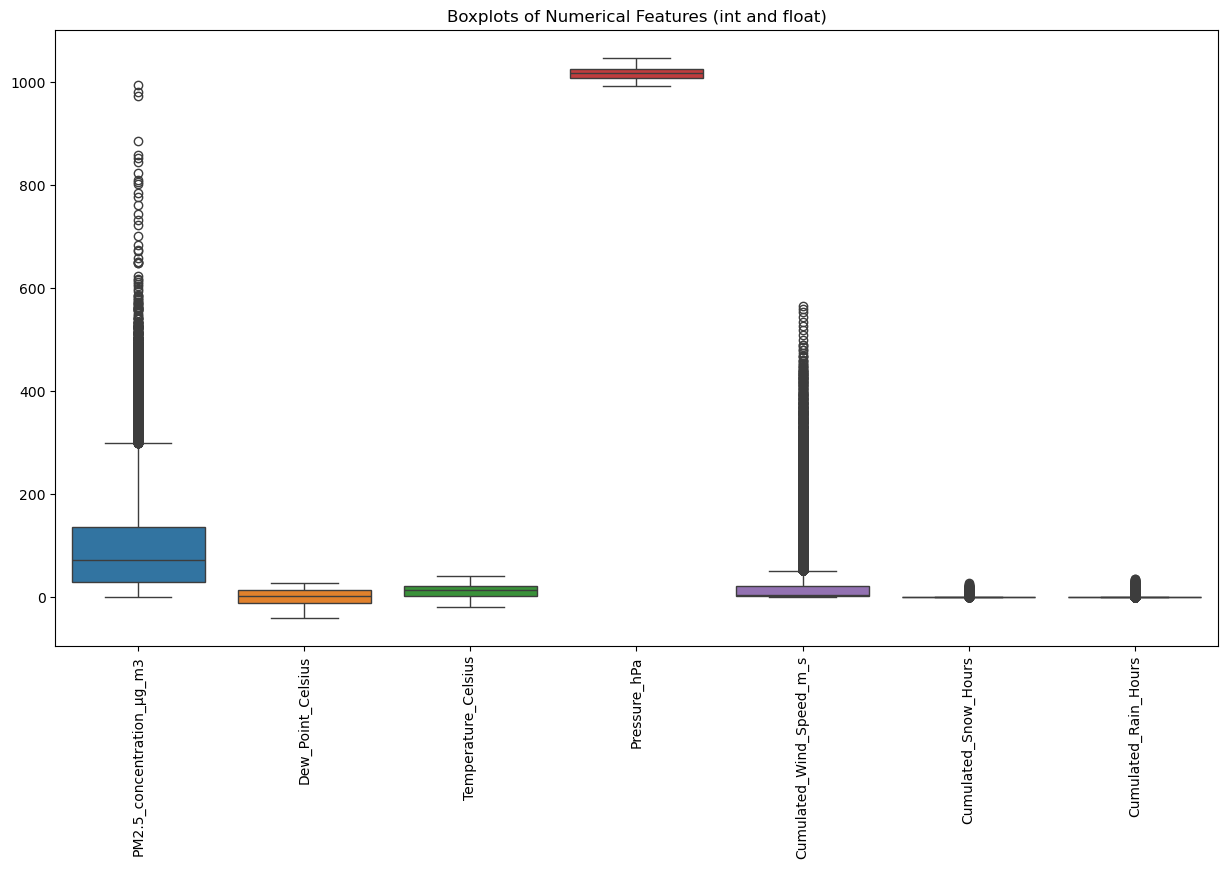

In [59]:
def visualize_outliers(X):
    """
    Visualizes outliers in the numerical columns (both int and float) of a DataFrame using boxplots.

    Parameters:
    X (pd.DataFrame): The input DataFrame containing numerical columns. The function 
                       will select columns of data types 'int64' and 'float64' for visualization.

    Returns:
    None: The function displays boxplots for each numerical feature in the DataFrame to 
          help identify potential outliers.

    Notes:
    - The function filters numerical features of types 'int64' and 'float64'.
    - Outliers are visualized as points outside the interquartile range (IQR) of each feature.
    - Boxplots display the median, quartiles, and potential outliers in the data.
    """
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=X.select_dtypes(include=['float64', 'int64'])) 
    plt.xticks(rotation=90)  
    plt.title("Boxplots of Numerical Features (int and float)")
    plt.show()


visualize_outliers(pm25_df)

In [60]:
# Constant trend is observed in the Cumulated_Snow_Hours and Cumulated_Rain_Hours columns
# Checking it 
constant_columns = pm25_df.columns[pm25_df.nunique() == 1]
constant_columns

Index([], dtype='object')

In [61]:
# since these are constant columns, they are irrelevant for the model
pm25_df.drop(columns=['Cumulated_Snow_Hours', 'Cumulated_Rain_Hours'], inplace=True)


In [62]:
def clip_outliers(X):
    """
    Clips the outliers in the numerical columns (both int64 and float64) of a DataFrame
    using the Interquartile Range (IQR) method. Outliers are replaced with the respective
    upper or lower limit.

    Parameters:
    X (pd.DataFrame): The input DataFrame containing numerical columns of types
                       'int64' and 'float64'.

    Returns:
    dict: A dictionary with feature names as keys and the count of outliers removed
          from each feature as values.

    """
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
    outlier_counts = {}

    for feature in numerical_features:
        Q1 = X[feature].quantile(0.25)
        Q3 = X[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Clip the outliers
        X[feature] = X[feature].clip(lower=lower_limit, upper=upper_limit)

        # Store count of outliers
        outliers = X[(X[feature] < lower_limit) | (X[feature] > upper_limit)]
        outlier_counts[feature] = outliers.shape[0]

    return outlier_counts

clip_outliers(pm25_df)

{'PM2.5_concentration_µg_m3': 0,
 'Dew_Point_Celsius': 0,
 'Temperature_Celsius': 0,
 'Pressure_hPa': 0,
 'Cumulated_Wind_Speed_m_s': 0}

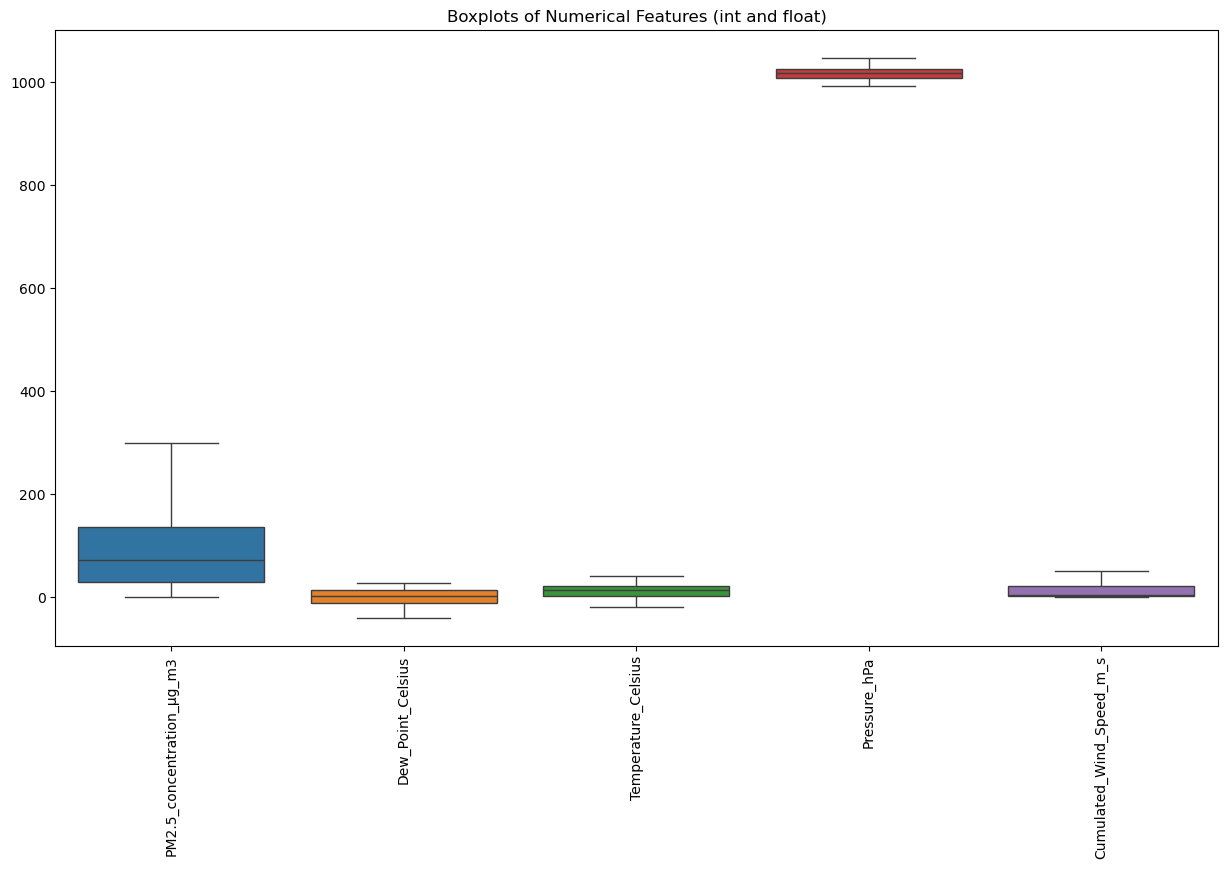

In [63]:
visualize_outliers(pm25_df)

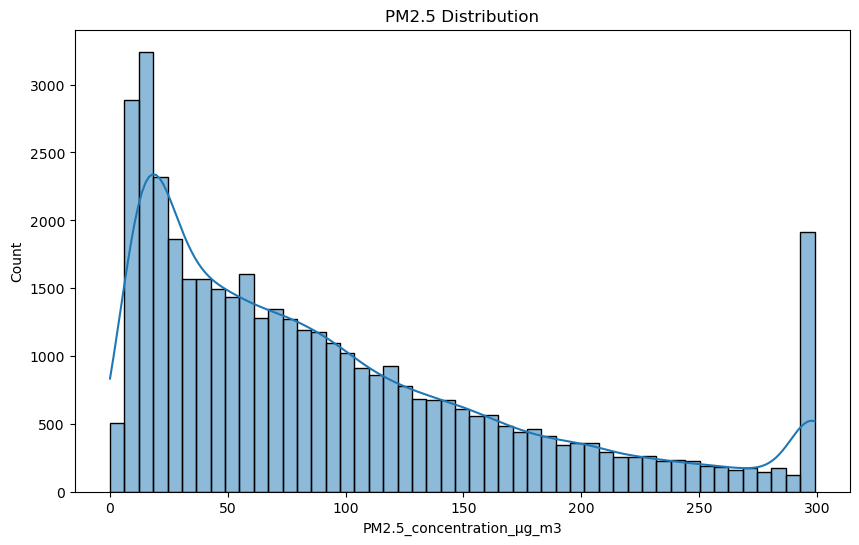

In [64]:
# Visualization: PM2.5 distribution
plt.figure(figsize=(10, 6))
sns.histplot(pm25_df["PM2.5_concentration_µg_m3"], kde=True)
plt.title("PM2.5 Distribution")
plt.show()

The histogram of PM2.5 concentration is right-skewed, indicating most values are low, with fewer high values. High PM2.5 events are rare.

In [65]:
# finiding correlation matrix
pm25_df.corr(numeric_only=True)

,PM2.5_concentration_µg_m3,Dew_Point_Celsius,Temperature_Celsius,Pressure_hPa,Cumulated_Wind_Speed_m_s,Combined_Wind_Direction_NW,Combined_Wind_Direction_SE,Combined_Wind_Direction_cv
PM2.5_concentration_µg_m3,1.000000,0.206117,-0.068428,-0.070903,-0.309781,-0.240567,0.120144,0.164331
Dew_Point_Celsius,0.206117,1.000000,0.823821,-0.777722,-0.248779,-0.335922,0.276411,0.090937
Temperature_Celsius,-0.068428,0.823821,1.000000,-0.826903,-0.060740,-0.267952,0.308562,-0.003479
Pressure_hPa,-0.070903,-0.777722,-0.826903,1.000000,0.099585,0.228578,-0.248891,-0.022060
Cumulated_Wind_Speed_m_s,-0.309781,-0.248779,-0.060740,0.099585,1.000000,0.343065,0.086995,-0.373315
Combined_Wind_Direction_NW,-0.240567,-0.335922,-0.267952,0.228578,0.343065,1.000000,-0.505640,-0.360551
Combined_Wind_Direction_SE,0.120144,0.276411,0.308562,-0.248891,0.086995,-0.505640,1.000000,-0.382262
Combined_Wind_Direction_cv,0.164331,0.090937,-0.003479,-0.022060,-0.373315,-0.360551,-0.382262,1.000000


<Axes: >

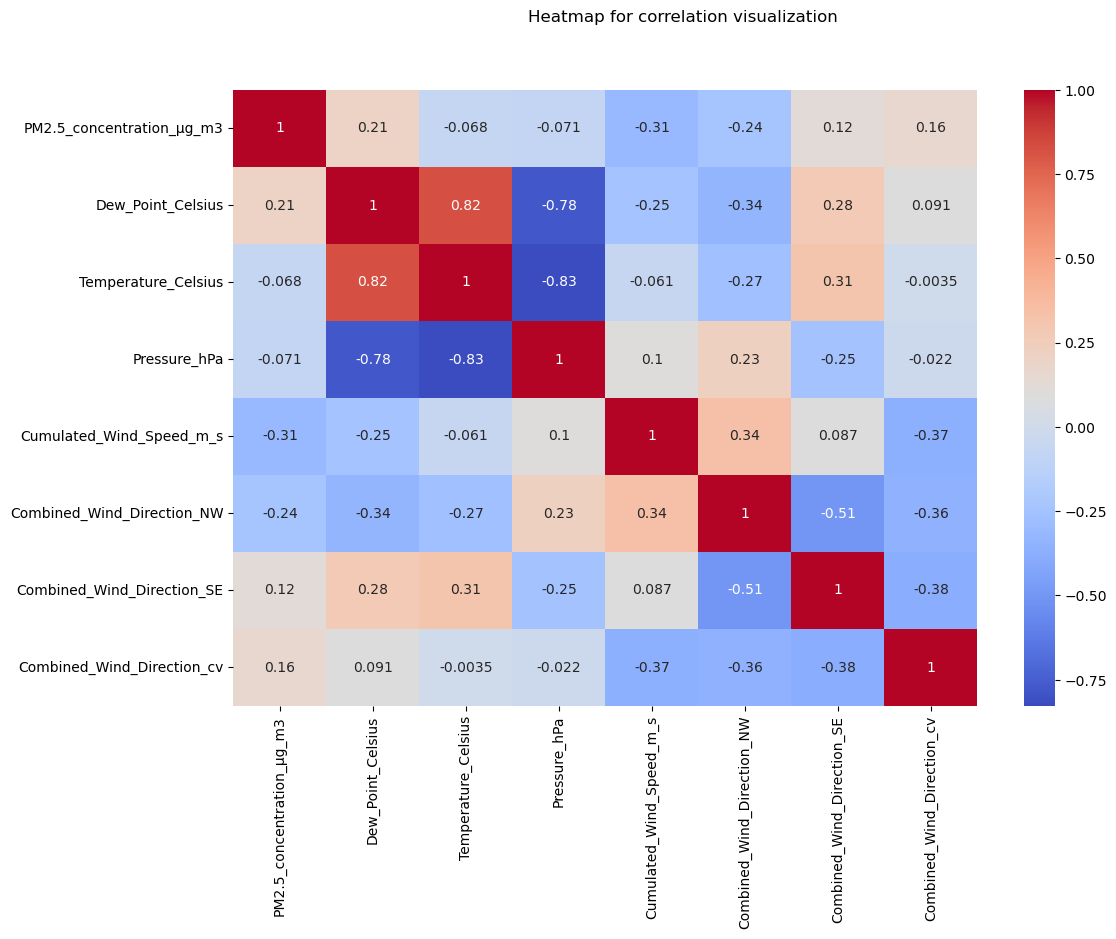

In [66]:
# correlation heatmap
plt.figure(figsize=(12, 8))
plt.suptitle("Heatmap for correlation visualization")
sns.heatmap(pm25_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

PM2.5 concentration has a positive correlation with dew point (0.206), suggesting higher moisture may trap pollutants. It shows a slight negative correlation with temperature (-0.068) and pressure (-0.071), indicating that warmer temperatures and high pressure systems could reduce PM2.5 by promoting dispersion. Wind speed has a moderate negative correlation (-0.310), meaning stronger winds help lower PM2.5 concentrations. Snow and rain hours have no variation (NaN) and do not affect PM2.5, so they can be removed from the dataset.

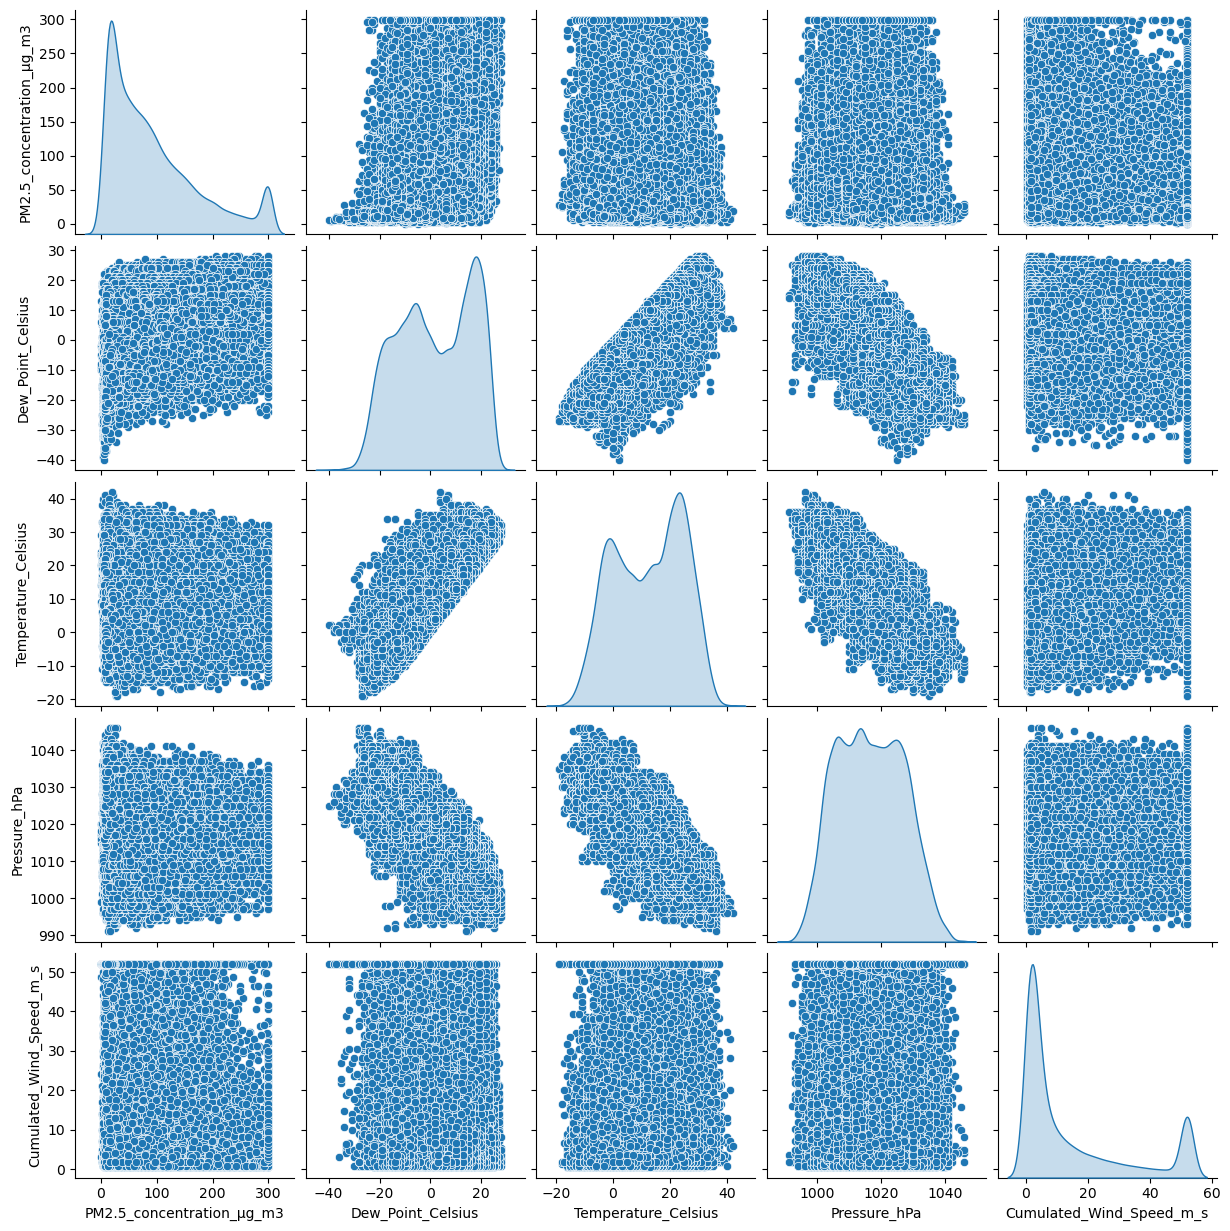

In [67]:
# pairplot for observing correlation
selected_features = ['PM2.5_concentration_µg_m3', 'Dew_Point_Celsius', 'Temperature_Celsius', 'Pressure_hPa', 'Cumulated_Wind_Speed_m_s']
sns.pairplot(pm25_df, vars=selected_features, diag_kind='kde')

In [68]:
# separate feature matrix and label vector
X = pm25_df.drop(["PM2.5_concentration_µg_m3", "datetime"], axis=1).select_dtypes(
    include=np.number
)
y = pm25_df["PM2.5_concentration_µg_m3"]

In [69]:
# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [70]:
print(f"X_train shape:{X_train.shape}\nX_test shape: {X_test.shape}\nX shape: {X.shape}")
print(f"y_train shape:{y_train.shape}\ny_test shape: {y_test.shape}\ny shape: {y.shape}")

X_train shape:(29229, 7)
X_test shape: (12528, 7)
X shape: (41757, 7)
y_train shape:(29229,)
y_test shape: (12528,)
y shape: (41757,)


In [71]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
class LinearRegression:
    """
    Linear Regression model from scratch. This class implements simple linear regression 
    using gradient descent to minimize the mean squared error (MSE).
    
    Attributes:
        learning_rate (float): The step size for gradient descent. Default is 0.01.
        iterations (int): The number of iterations to run gradient descent. Default is 1000.
        theta (numpy.ndarray): The coefficients for the features after training.
        bias (float): The intercept term after training.
        m (int): The number of data points in the training set.
        n (int): The number of features in the training set.
    """
    
    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Initializes the LinearRegression model.

        Args:
            learning_rate (float): The step size for gradient descent.
            iterations (int): The number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        """
        Trains the Linear Regression model using gradient descent.

        Args:
            X (numpy.ndarray): The input features, shape (m, n), where m is the number of samples and n is the number of features.
            y (numpy.ndarray): The target values, shape (m, ).
            
        Returns:
            None: Updates the model's theta and bias attributes.
        """
        self.m, self.n = X.shape  # m: number of samples, n: number of features
        self.theta = np.zeros(self.n)  # Initialize weights (theta) to zeros
        self.bias = 0  # Initialize bias to zero
        self.X = X
        self.y = y

        # Gradient descent optimization loop
        for _ in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        """
        Performs one step of gradient descent to update the weights (theta) and bias.

        Returns:
            None: Updates the model's weights (theta) and bias.
        """
        y_pred = self.predict(self.X)  # Predict the target values
        # Compute the gradients for theta and bias
        d_theta = -(2 / self.m) * np.dot(self.X.T, (self.y - y_pred))
        d_bias = -(2 / self.m) * np.sum(self.y - y_pred)

        # Update the weights and bias using the gradients
        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        """
        Makes predictions using the trained linear regression model.

        Args:
            X (numpy.ndarray): The input features, shape (m, n), where m is the number of samples and n is the number of features.
        
        Returns:
            numpy.ndarray: Predicted values, shape (m, ).
        """
        return np.dot(X, self.theta) + self.bias  # Linear regression equation: y = X * theta + bias


In [73]:
# Train models
custom_lr = LinearRegression(learning_rate=0.01, iterations=1000)
custom_lr.fit(X_train_scaled, y_train)
y_pred_custom = custom_lr.predict(X_test_scaled)

# Check the first ten predictions
y_pred_custom[:10]

array([139.95709392,  28.9359753 , 113.97580044,  80.81726004,
        62.94648655,  56.23912609,  94.01662654,  25.40855742,
       130.80691366,  98.30421276])

In [74]:
# Model Evaluation of Linear Regression from Scratch (Testing Set)
mse_linearScratch = mean_squared_error(y_pred_custom, y_test)
r2_score_linearScratch = r2_score(y_test, y_pred_custom)

print(
    f"Linear Regression Scratch\nMSE: {mse_linearScratch}\nR2: {r2_score_linearScratch}"
)

Linear Regression Scratch
MSE: 4577.170161799139
R2: 0.28693065130229367


Linear Regression Model did not perform well as indicated by the low R2 and high MSE.

**Model 1: KNN Regressor**  

In [75]:
# Initialize KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit model on standardized data
knn_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_reg.predict(X_test_scaled)

# Check the first ten predictions
y_pred_knn[:10]


array([179.8,   8.4, 147.2,  83.4,  39.4,  10. ,  80.4,  13. , 133.8,
        38.8])

In [76]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f"K Nearest Neighbors Regressor\nMean Squared Error: {mse:.4f} \nR2 Score: {r2:.4f}")

K Nearest Neighbors Regressor
Mean Squared Error: 3784.7297 
R2 Score: 0.4104


**Model 2: Random Forest Regressor**

In [77]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

# Check the first ten predictions
y_pred_rf[:10]

array([211.23      ,  19.62      , 190.45      ,  72.9       ,
        40.95      ,  21.29      ,  80.04566667,  17.76166667,
       152.08      ,  66.05      ])

In [78]:
models = {"Custom LR": custom_lr, "KNN Regressor": knn_reg, "Random Forest": rf}

In [79]:
for name, model in models.items():
    if name == "Custom LR":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test_scaled)
    print(
        f"{name} - MSE: {mean_squared_error(y_test, y_pred):.2f}, R2: {r2_score(y_test, y_pred):.2f}"
    )

Custom LR - MSE: 4577.17, R2: 0.29
KNN Regressor - MSE: 3784.73, R2: 0.41
Random Forest - MSE: 3666.92, R2: 0.43


From the evaluations, Random Forest Regressor seems to perform better than KNN Regressor.  So, we will use Random Forest for our model.

**Hyperparameter Tuning with Cross Validation for KNN Regressor**

In [80]:

# Define the parameter grid for KNN Regressor
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

# Initialize the GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid_knn,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
)

# Fit the model
grid_search_knn.fit(X_train_scaled, y_train)

# Get the best parameters and best score for KNN Regressor
best_params_knn = grid_search_knn.best_params_
best_score_knn = -grid_search_knn.best_score_

# Print the best hyperparameters and mean squared error for KNN Regressor
print(f"Best parameters for KNN Regressor: {best_params_knn}")
print(f"Best cross-validated MSE for KNN Regressor: {best_score_knn}")

y_pred_knn = grid_search_knn.predict(X_test_scaled)

accuracy_rf = r2_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_rf)

Best parameters for KNN Regressor: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validated MSE for KNN Regressor: 3713.30630552236
Accuracy: 0.4282190072489702


**Hyperparameter Tuning with Cross Validation for Random Forest Regressor**

In [81]:
# Hyperparameter Tuning
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

In [82]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)

print("First 5 predictions:", y_pred_rf[:5])

accuracy_rf = r2_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
First 5 predictions: [196.87105159  20.88276876 182.07927096  71.69819316  39.88672301]
Accuracy: 0.44917158173683425


In [83]:
# Feature Selection
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
selected_features = X.columns[sorted_idx[:5]]
selected_features

Index(['Dew_Point_Celsius', 'Temperature_Celsius', 'Cumulated_Wind_Speed_m_s',
       'Pressure_hPa', 'Combined_Wind_Direction_NW'],
      dtype='object')

**Final Model Building using KNN Regressor**

In [84]:
# Final Model
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [85]:
best_rf.fit(X_train_selected, y_train)
final_pred = best_rf.predict(X_test_selected)
print(
    f"Final Model \nMSE: {mean_squared_error(y_test, final_pred):.2f}, R2: {r2_score(y_test, final_pred):.2f}"
)

Final Model 
MSE: 3614.80, R2: 0.44
